# Project
*   Name: B Bharath
*   Data Science
*   Email Id: bboline@gitam.in

# **Bank Client Data**
```
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')

```

# **Related with the last contact of the current campaign**
```
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric).
```
Important note: This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# **Other Attributes**
```
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
```

# **Social and Economic Context Attributes**
```
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)
21- Has the client subscribed to a term deposit? (binary: 'yes','no')
```

# Code & Execution

1)Import the necessary libraries




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


2)Load the data as a data frame using pandas

In [ ]:
# Load dataset
bank = pd.read_csv("bank-full.csv")

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

3) Shape of the data

In [ ]:
# Display dataset information
print("Dataset Shape:", bank.shape)
print("Column Names:", bank.columns.tolist())
print("First 5 Rows:\n", bank.head())


Dataset Shape: (45211, 17)
Column Names: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
First 5 Rows:
    age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92   

4)Data type of each attribute

In [ ]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
# Rename target column
bank.rename(columns={'y': 'Target'}, inplace=True)

5)Checking the presence of missing values

In [ ]:
# Data Cleaning
print("Checking for missing values:\n", bank.isnull().sum())
bank.drop_duplicates(inplace=True)
print("Dataset Shape after removing duplicates:", bank.shape)


Checking for missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64
Dataset Shape after removing duplicates: (45211, 17)


6)5 point summary of numerical attributes

In [ ]:
# Five-number summary
print("Five-number summary:\n", bank.describe().T)

Five-number summary:
             count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0  


Checking Imbalance

In [ ]:
# Check class imbalance
print("Class distribution:\n", bank['y'].value_counts())

Class distribution:
 y
no     39922
yes     5289
Name: count, dtype: int64


**Given data set is highly imbalanced, i.e. number of data belonging to 'no' category is way higher than 'yes' category.**

In [ ]:
bank['y'].value_counts(normalize=True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

The response rate is only 11.6%. Hence the Y(Target) variable has a high class imbalance. Hence accuracy will not be a reliable model performance measure.

FN is very critical for this business case because a false negative is a customer who will potentially subscribe for a loan but who has been classified as 'will not subscribe'. Hence the most relevant model performance measure is recall. **bold text**

In [ ]:
# Encode categorical variables
categorical_cols = bank.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'Target':
        bank[col] = LabelEncoder().fit_transform(bank[col])

In [ ]:
# Convert target variable to binary
bank['Target'] = bank['Target'].map({'yes': 1, 'no': 0})

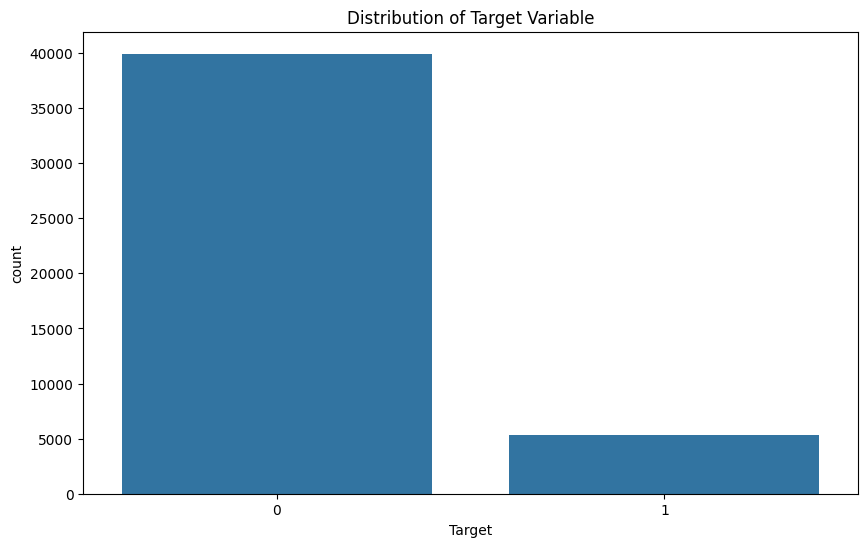

In [ ]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.countplot(x='Target', data=bank)
plt.title("Distribution of Target Variable")
plt.show()

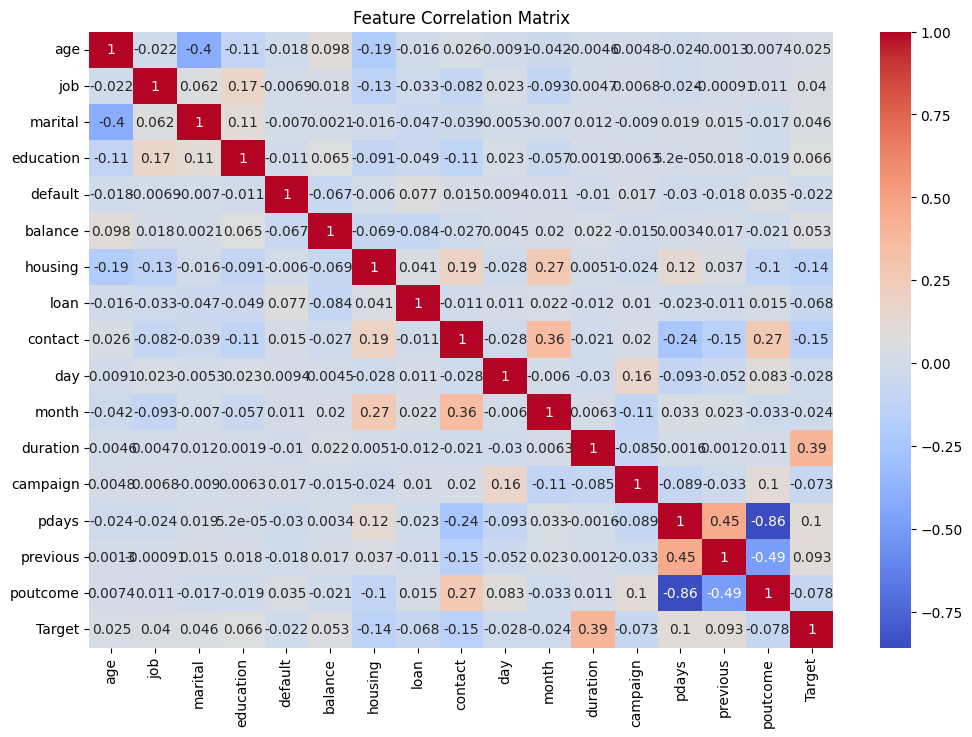

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(bank.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


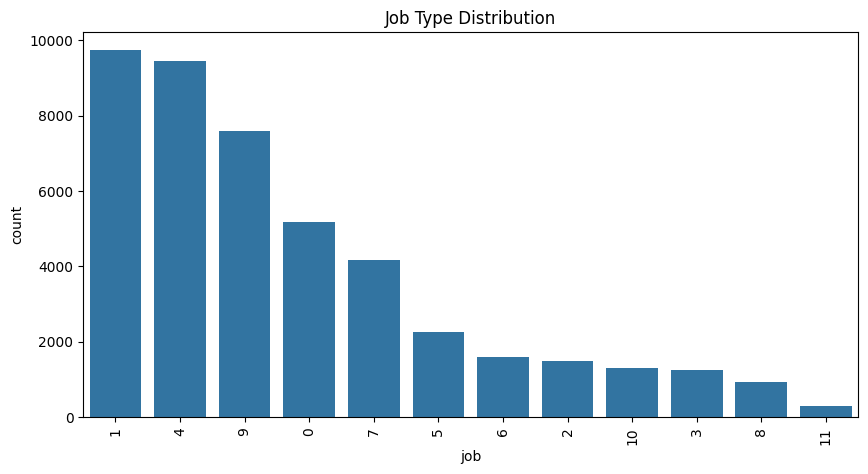

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='job', data=bank, order=bank['job'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Job Type Distribution")
plt.show()


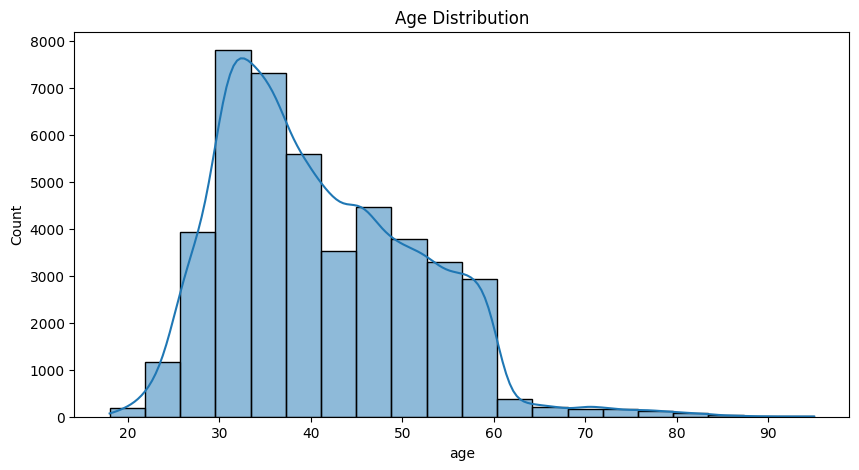

In [ ]:
# Additional Visualizations
plt.figure(figsize=(10,5))
sns.histplot(bank['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


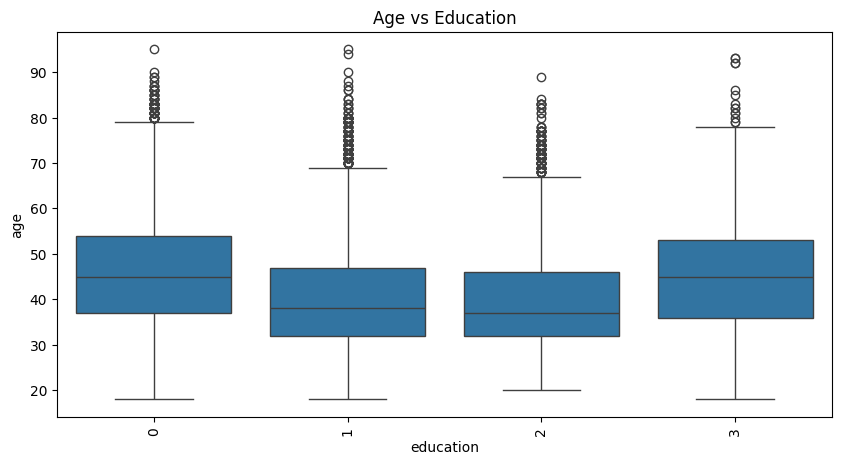

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='education', y='age', data=bank)
plt.xticks(rotation=90)
plt.title("Age vs Education")
plt.show()

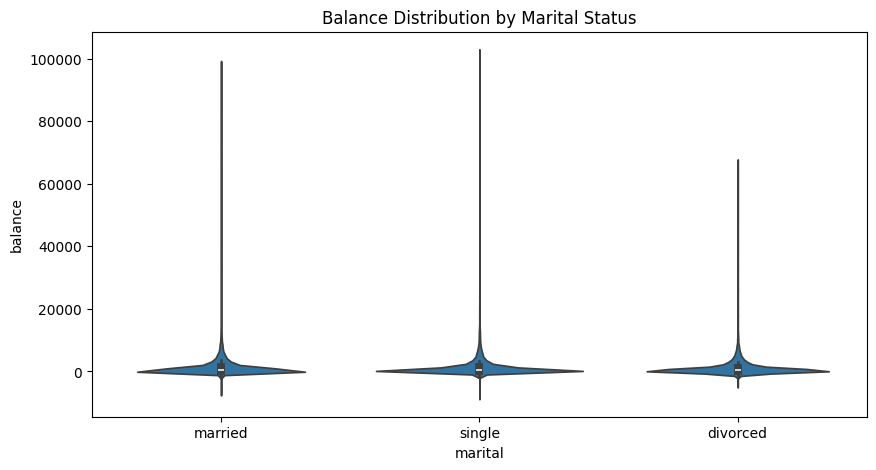

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='marital', y='balance', data=bank)
plt.title("Balance Distribution by Marital Status")
plt.show()


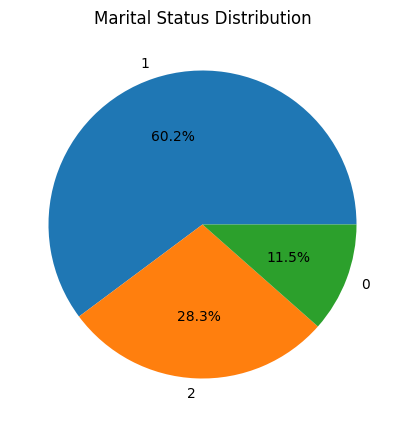

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(bank['marital'].value_counts(), labels=bank['marital'].value_counts().index, autopct='%1.1f%%')
plt.title("Marital Status Distribution")
plt.show()

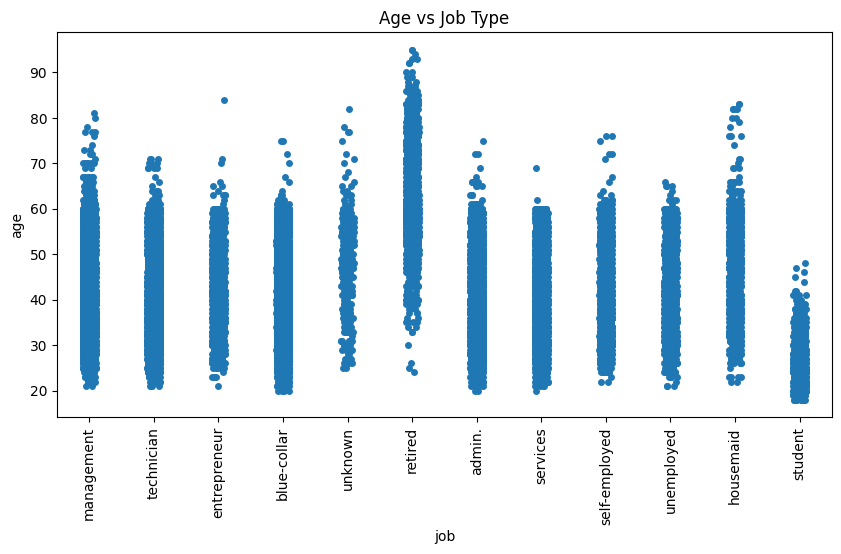

In [ ]:
plt.figure(figsize=(10,5))
sns.stripplot(x='job', y='age', data=bank, jitter=True)
plt.xticks(rotation=90)
plt.title("Age vs Job Type")
plt.show()

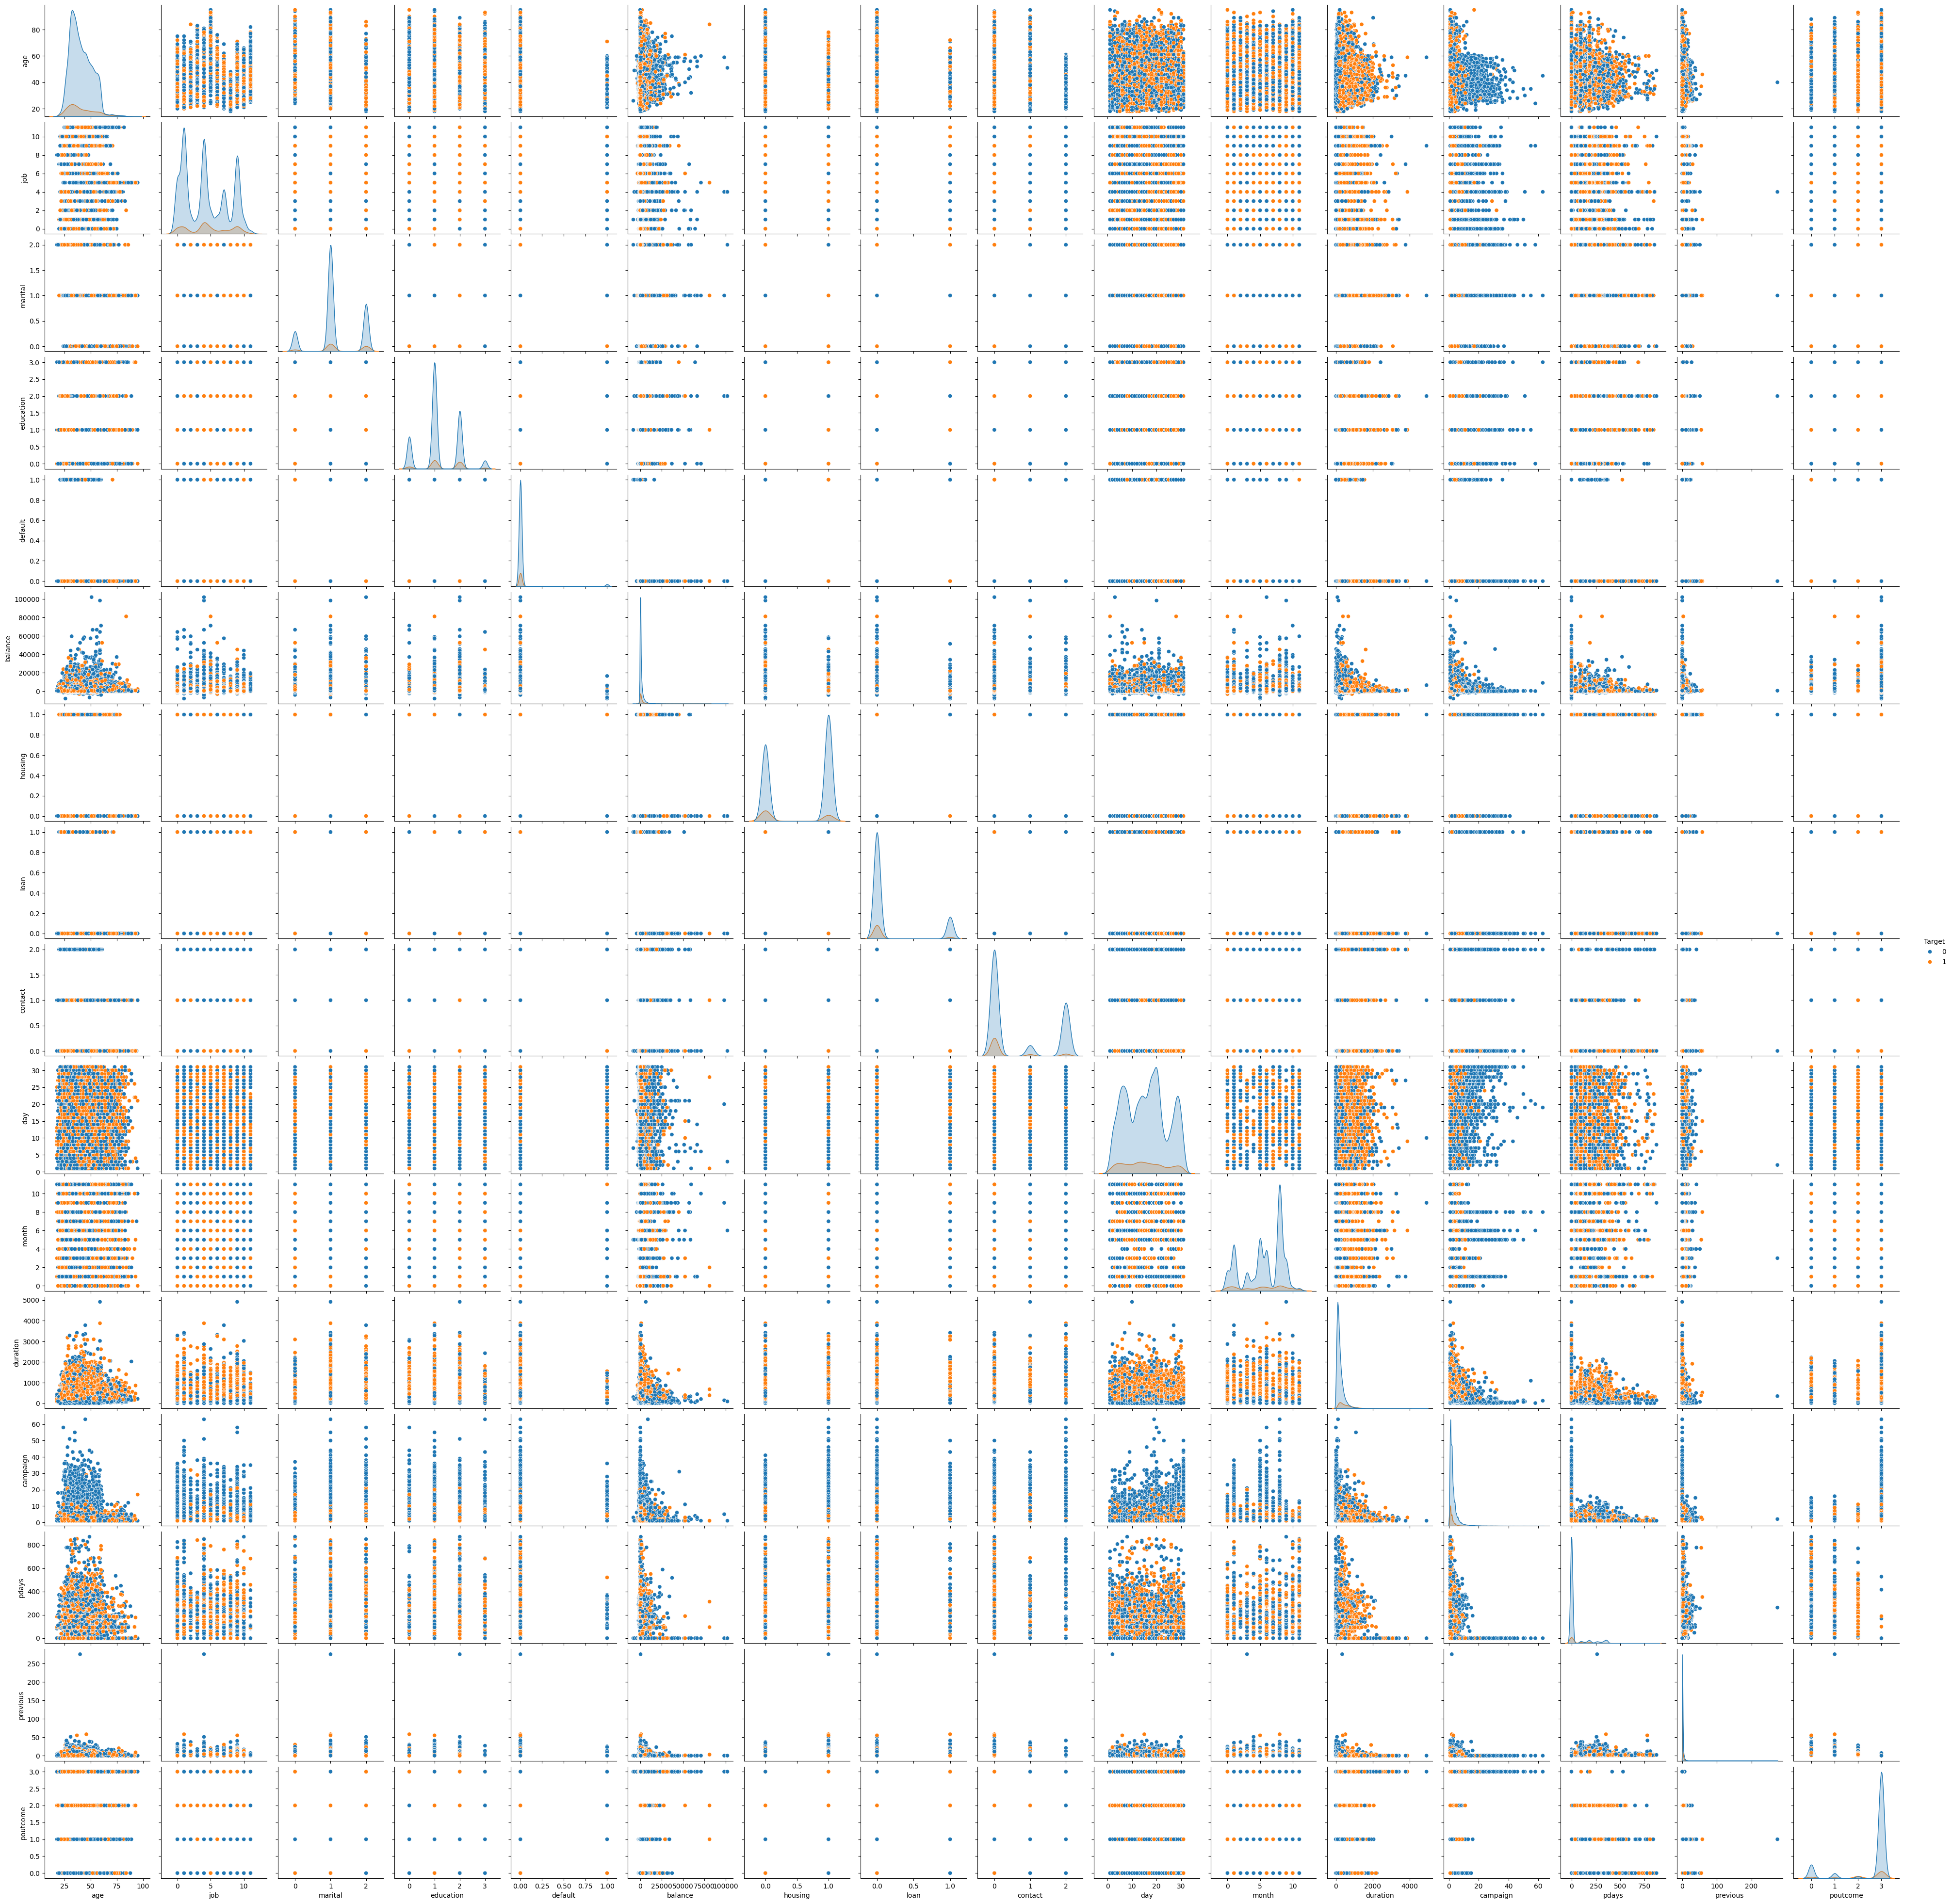

In [ ]:
sns.pairplot(bank, hue="Target")
plt.show()


In [ ]:
# Feature Selection & Preprocessing
X = bank.drop(columns=['Target'])
y = bank['Target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
# Model Training
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Ada Boosting": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Bagging Classifier": BaggingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

In [ ]:
results = {}
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A",
        "Cross Validation Score": cross_val_score(model, X_train, y_train, cv=k_fold, scoring='accuracy').mean()
    }

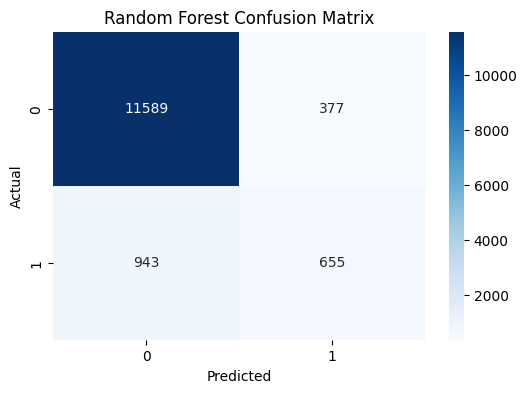

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.63      0.41      0.50      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564



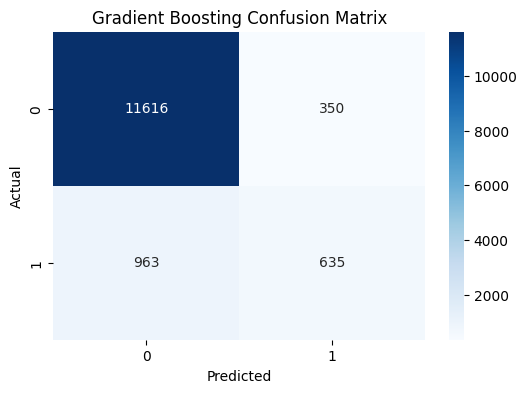

Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.64      0.40      0.49      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.68      0.72     13564
weighted avg       0.89      0.90      0.89     13564



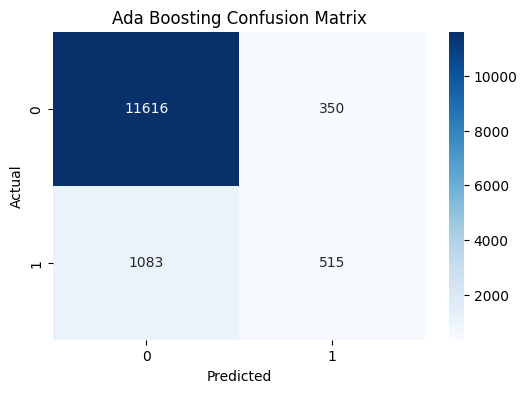

Classification Report for Ada Boosting:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     11966
           1       0.60      0.32      0.42      1598

    accuracy                           0.89     13564
   macro avg       0.76      0.65      0.68     13564
weighted avg       0.88      0.89      0.88     13564



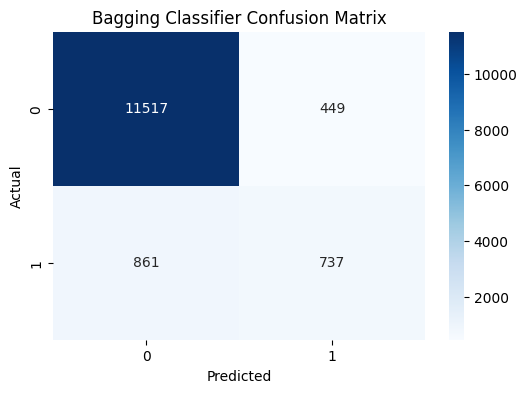

Classification Report for Bagging Classifier:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     11966
           1       0.62      0.46      0.53      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.71      0.74     13564
weighted avg       0.89      0.90      0.90     13564



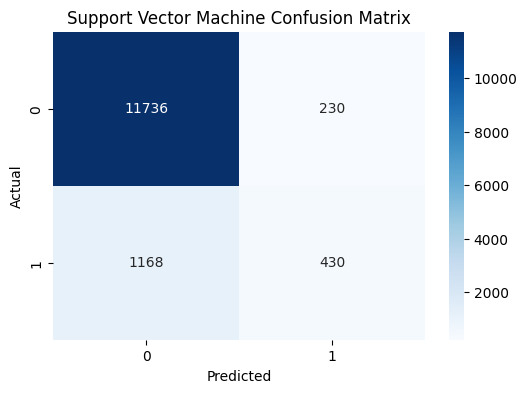

Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.65      0.27      0.38      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.62      0.66     13564
weighted avg       0.88      0.90      0.88     13564



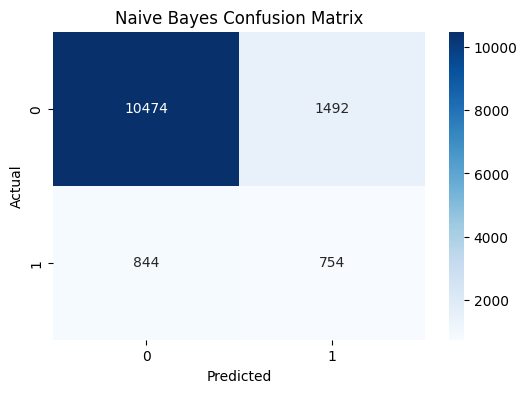

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90     11966
           1       0.34      0.47      0.39      1598

    accuracy                           0.83     13564
   macro avg       0.63      0.67      0.65     13564
weighted avg       0.86      0.83      0.84     13564



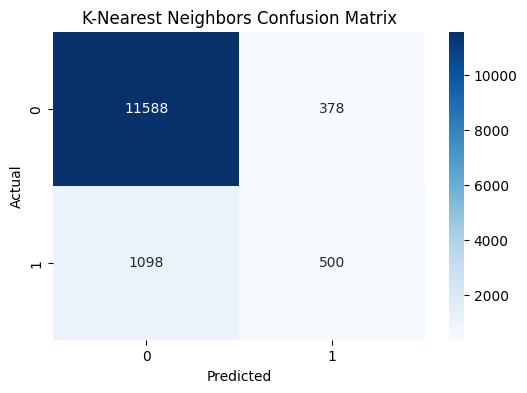

Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     11966
           1       0.57      0.31      0.40      1598

    accuracy                           0.89     13564
   macro avg       0.74      0.64      0.67     13564
weighted avg       0.87      0.89      0.88     13564



In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A",
        "Cross Validation Score": cross_val_score(model, X_train, y_train, cv=k_fold, scoring='accuracy').mean()
    }

    # Confusion Matrix Visualization
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))


In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test)

    # Classification Report
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))
    print("="*80)  # Separator for better readability


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.63      0.41      0.50      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564

Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.64      0.40      0.49      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.68      0.72     13564
weighted avg       0.89      0.90      0.89     13564

Classification Report for Ada Boosting:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     11966
           1       0.60      0.32      0.42      1598

    accuracy                           0.89     13564

In [ ]:
# Display results
results_df = pd.DataFrame(results).T
print(results_df)


                        Accuracy  Precision    Recall  F1 Score   ROC AUC  \
Random Forest           0.902684   0.634690  0.409887  0.498099  0.923900   
Gradient Boosting       0.903200   0.644670  0.397372  0.491676  0.920559   
Ada Boosting            0.894353   0.595376  0.322278  0.418189  0.903568   
Bagging Classifier      0.903421   0.621417  0.461202  0.529454  0.916690   
Support Vector Machine  0.896933   0.651515  0.269086  0.380868  0.853672   
Naive Bayes             0.827779   0.335708  0.471840  0.392300  0.810998   
K-Nearest Neighbors     0.891183   0.569476  0.312891  0.403877  0.814600   

                        Cross Validation Score  
Random Forest                         0.905172  
Gradient Boosting                     0.904003  
Ada Boosting                          0.896767  
Bagging Classifier                    0.903845  
Support Vector Machine                0.899295  
Naive Bayes                           0.835497  
K-Nearest Neighbors                   0.

**Best Model Based on Performance Metrics, To determine the best model, we need to focus on key metrics:**

*   Accuracy – Higher is better.
*   Precision – Important if false positives are costly.
*   F1 Score – Balances precision & recall (good for imbalanced datasets).
*  ROC AUC – Measures how well the model distinguishes between classes.
*   Cross-Validation Score – Ensures the model generalizes well to unseen data.


**RandomForest is the Best Model**